**SQL Scavenger Hunt Solutions**

Here you will find solutions for the [SQL Scavenger Hunt](https://www.kaggle.com/rtatman/sql-scavenger-hunt-handbook).  
Original Assignments: [Day 1](https://www.kaggle.com/rtatman/sql-scavenger-hunt-day-1),
[Day 2](https://www.kaggle.com/rtatman/sql-scavenger-hunt-day-2),
[Day 3](https://www.kaggle.com/rtatman/sql-scavenger-hunt-day-3),
[Day 4](https://www.kaggle.com/rtatman/sql-scavenger-hunt-day-4),
[Day 5](https://www.kaggle.com/rtatman/sql-scavenger-hunt-day-5).


In [1]:
import bq_helper
open_aq = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="openaq")
hacker_news = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="hacker_news")
accidents = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="nhtsa_traffic_fatalities")
bitcoin_blockchain = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                              dataset_name="bitcoin_blockchain")
github = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                              dataset_name="github_repos")

**Day 1: Air Quality Data
**

Which countries use a unit other than ppm to measure any type of pollution? (Hint: to get rows where the value isn't something, use "!=")

Which pollutants have a value of exactly 0?

In [2]:
query1A = """SELECT distinct country
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE unit != 'ppm'
        """
response1A = open_aq.query_to_pandas_safe(query1A)
response1A.head(5)

,country
0,US
1,FR
2,TH
3,IN
4,NL


In [3]:
query1B = """SELECT distinct pollutant
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE value = 0
        """
result1B = open_aq.query_to_pandas_safe(query1B)
result1B.head(5)

,pollutant
0,pm25
1,so2
2,no2
3,o3
4,co


**Day 2: Hacker News Data
**

How many stories (use the "id" column) are there of each type (in the "type" column) in the full table?

How many comments have been deleted? (If a comment was deleted the "deleted" column in the comments table will have the value "True".)

Optional extra credit: read about aggregate functions other than COUNT() and modify one of the queries you wrote above to use a different aggregate function.

In [4]:
query2A = """
SELECT type,COUNT(id) AS count
FROM `bigquery-public-data.hacker_news.full`
GROUP BY type
ORDER BY count DESC
"""
result2A = hacker_news.query_to_pandas_safe(query2A)
result2A.head(5)

,type,count
0,comment,13534262
1,story,2852337
2,pollopt,11806
3,job,10192
4,poll,1728


In [5]:
query2B = """
SELECT COUNT(deleted) AS Number_of_Deleted_Comments
FROM `bigquery-public-data.hacker_news.comments`
"""
result2B = hacker_news.query_to_pandas_safe(query2B)
result2B.head(5)

,Number_of_Deleted_Comments
0,227736


In [6]:
query2C = """SELECT author, 
            AVG(ranking)
            FROM `bigquery-public-data.hacker_news.comments`
            GROUP BY author
            ORDER BY AVG(ranking) DESC
        """
result2C = hacker_news.query_to_pandas_safe(query2C)
result2C.head(5)


,author,f0_
0,mehmet51,1310.0
1,kiki,1309.0
2,heather,1308.0
3,Arpad,1307.0
4,mdnajim859,1305.0


**Day 3: Traffic Fatality Data
**

Which hours of the day do the most accidents occur during?

Which state has the most hit and runs?


In [7]:
query3A =     """ 
                                SELECT  DATE(timestamp_of_crash),
                                        EXTRACT(HOUR FROM timestamp_of_crash) AS `Hour`,
                                        COUNT(consecutive_number) AS `Accidents`
                                FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
                                GROUP BY  timestamp_of_crash
                                ORDER BY  COUNT(consecutive_number) DESC                                        
                               """
result3A = accidents.query_to_pandas_safe(query3A)
result3A.head(10)

,f0_,Hour,Accidents
0,2015-10-24,18,4
1,2015-10-21,0,4
2,2015-12-31,22,4
3,2015-12-22,0,4
4,2015-10-26,13,3
5,2015-07-14,18,3
6,2015-12-23,15,3
7,2015-06-15,0,3
8,2015-07-04,19,3
9,2015-07-04,19,3


In [8]:
query3B =     """ 
                                SELECT registration_state_name AS `State`,
                                                COUNT(consecutive_number) AS `HitAndRuns`
                                FROM `bigquery-public-data.nhtsa_traffic_fatalities.vehicle_2015`
                                WHERE hit_and_run LIKE "Yes" AND registration_state_name NOT LIKE "Unknown"
                                GROUP BY  registration_state_name
                                ORDER BY  COUNT(consecutive_number) DESC                                        
                               """
result3B = accidents.query_to_pandas_safe(query3B)
result3B.head(10)

,State,HitAndRuns
0,California,155
1,Florida,96
2,Texas,86
3,New York,38
4,Michigan,33
5,Arizona,31
6,North Carolina,30
7,Wisconsin,29
8,Pennsylvania,26
9,Georgia,26


**Day 4: Bitcoin Data
**

How many Bitcoin transactions were made each day in 2017?

How many blocks are associated with each merkle root?


   transactions  day  month  year
0        180502    1      1  2017
1        290951    2      1  2017
2        301664    3      1  2017
3        328642    4      1  2017
4        288501    5      1  2017


Text(0.5,1,'Daily Bitcoin Transcations in 2017')

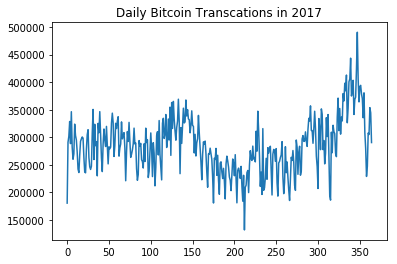

In [9]:
query4A = """ WITH time AS 
            (
                SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
                    transaction_id
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            )
            SELECT COUNT(transaction_id) AS transactions,
                EXTRACT(DAY FROM trans_time) AS day,
                EXTRACT(MONTH FROM trans_time) AS month,
                EXTRACT(YEAR FROM trans_time) AS year
            FROM time
            WHERE EXTRACT(YEAR FROM trans_time) = 2017
            GROUP BY year, month, day 
            ORDER BY year, month, day
        """
result4A = bitcoin_blockchain.query_to_pandas_safe(query4A, max_gb_scanned=21)
print(result4A.head(5))
import matplotlib.pyplot as plt
plt.plot(result4A.transactions)
plt.title("Daily Bitcoin Transcations in 2017")

In [10]:
query4B="""SELECT COUNT(block_id) AS Number_of_Blocks, Merkle_Root
           FROM `bigquery-public-data.bitcoin_blockchain.blocks`
           GROUP BY Merkle_Root
           ORDER BY Number_of_Blocks
        """
result4B = bitcoin_blockchain.query_to_pandas(query4B)
result4B.head(10)

,Number_of_Blocks,Merkle_Root
0,1,03dffbf0b2b7187ade919dd69bf925b6a8810c2e0d4048...
1,1,8e96527e80b4d34ddc4648603b95ca3015b8186eb3c93c...
2,1,89687d202e53bf59af734f402c50a36731c38168f5acbd...
3,1,075d0c4df55b3f2d164afdff8f603d9b87831e2a3fc381...
4,1,8bf5f651dffefa07fa1edc0d2bc93ece4a6133e367d40e...
5,1,ad439588f3d3ab938c9cce735ded67845fedc0f0f0908e...
6,1,a851c2520e90850d2dfe5e27e44113642618a167e209d4...
7,1,c659e9c71f7cb0479e193ff1b6801c41adf86123a62f92...
8,1,e494c605b80639ef87ae0a868383ad5ee1c3baa46dc217...
9,1,25aa44b91f5c6fbb53c0f8a89073d74c0280d441577ea8...


**Day 5: GitHub Data
**

How many commits (recorded in the "sample_commits" table) have been made in repos written in the Python programming language?


In [11]:
query5A = ("""
        SELECT COUNT(commit) AS Total_Number_of_Commits_in_Python
        FROM `bigquery-public-data.github_repos.sample_commits` AS sc
        INNER JOIN `bigquery-public-data.github_repos.sample_files` AS sf 
            ON sc.repo_name = sf.repo_name
            WHERE sf.path LIKE '%.py'        
        """)
result5A = bitcoin_blockchain.query_to_pandas(query5A)
result5A.head(10)

,Total_Number_of_Commits_in_Python
0,31695737


In [12]:
query5B="""with temp AS
             (SELECT sf.path AS path, sc.commit AS commit, sc.repo_name AS Repository_Name
              FROM `bigquery-public-data.github_repos.sample_files` AS sf
              INNER JOIN `bigquery-public-data.github_repos.sample_commits` AS sc 
              ON sf.repo_name = sc.repo_name
              WHERE path LIKE '%.py'
            )
            SELECT count(commit) AS Number_of_Commits_in_Python, Repository_Name
            FROM temp
            GROUP BY Repository_Name 
            ORDER BY Number_of_Commits_in_Python DESC
            """
result5B = bitcoin_blockchain.query_to_pandas(query5B)
result5B

,Number_of_Commits_in_Python,Repository_Name
0,23501556,torvalds/linux
1,4128858,tensorflow/tensorflow
2,4044664,apple/swift
3,13750,facebook/react
4,6909,Microsoft/vscode
